In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from skimage.io import imread_collection
import seaborn as sns
import matplotlib.pyplot as plt
import random
random.seed(10)


In [2]:
images = np.array(imread_collection(r'./Train/*.jpg'))

train=np.zeros((2400, 784))
for i in range(len(images)):
    train[i]=images[i].flatten()


In [3]:
test_images = np.array(imread_collection(r'./Test/*.jpg'))
test=np.zeros((200, 784))
for i in range(len(test_images)):
    test[i]=test_images[i].flatten()

In [4]:
labels = np.loadtxt(r"./Train/Training Labels.txt", dtype=int)
labels_test = np.loadtxt(r"./Test/Test Labels.txt", dtype=int)

In [5]:
def sample(num_samples,data,labels):
    indices = list(range(len(train)))
    rndm = random.choices(indices, weights=None, cum_weights=None, k=num_samples)
    rndm_samples = []
    rndm_labels = []
    for i in rndm:
        rndm_samples.append(data[i])
        rndm_labels.append(labels[i])
    return rndm_samples,rndm_labels

In [6]:
def decision(num_trees,num_samples,labels,depth,data):
    trees = []
    for i in range(num_trees):
        tree = DecisionTreeClassifier(max_depth=depth,random_state=10)
        sample_data,sample_label = sample(num_samples,data,labels)
        tree.fit(sample_data,sample_label)
        trees.append(tree)
    return trees

In [7]:
def predictions(trees,test):
    predictions = []
    for i in range(len(trees)):
        pred = trees[i].predict(test)
        predictions.append(pred)
    return predictions

In [8]:
def vote(predictions):
    votes = np.zeros(len(predictions[0]))
    for i in range(len(predictions[0])):
        counter = np.zeros(10)
        for j in range(len(predictions)):
            counter[predictions[j][i]] += 1
        maximum = np.where(counter==np.max(counter))[0][0]
        votes[i] = maximum
    return votes.astype(int)

In [9]:
def accuracy(true,result):
    score = (accuracy_score(true,result)*100)
    print("Accuracy: ",score,"%")
    return score
    
def confusion(true,result):
    cm = confusion_matrix(true,result)
    print(cm)
    return cm

In [10]:
tree1 = decision(10,50,labels,10,train)
tree2 = decision(100,50,labels,10,train)
tree3 = decision(100,500,labels,10,train)
tree4 = decision(100,1000,labels,100,train)

In [11]:
predictions1 = predictions(tree1,test)
predictions2 = predictions(tree2,test)
predictions3 = predictions(tree3,test)
predictions4 = predictions(tree4,test)

vote1 = vote(predictions1)
vote2 = vote(predictions2)
vote3 = vote(predictions3)
vote4 = vote(predictions4)

In [12]:
accuracy1 = accuracy(labels_test,vote1)
accuracy2 = accuracy(labels_test,vote2)
accuracy3 = accuracy(labels_test,vote3)
accuracy4 = accuracy(labels_test,vote4)

Accuracy:  52.5 %
Accuracy:  77.0 %
Accuracy:  83.5 %
Accuracy:  86.5 %


In [13]:
confustion1 = confusion(labels_test,vote1)

[[15  0  0  1  2  1  1  0  0  0]
 [ 0 19  0  0  0  1  0  0  0  0]
 [ 4  3  4  0  3  1  0  1  4  0]
 [ 0  0  1 12  2  4  0  0  0  1]
 [ 1  2  0  0 12  0  2  0  0  3]
 [ 2  0  1  2  0  8  1  1  1  4]
 [ 3  0  2  0  5  0 10  0  0  0]
 [ 3  1  0  1  2  2  0  8  0  3]
 [ 1  3  0  4  1  1  0  0  9  1]
 [ 2  1  0  1  7  1  0  0  0  8]]


In [14]:
confustion2 = confusion(labels_test,vote2)

[[18  0  0  0  0  0  1  0  1  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 0  3 15  1  1  0  0  0  0  0]
 [ 0  1  0 17  0  1  0  0  0  1]
 [ 0  1  0  1 15  0  0  0  0  3]
 [ 1  1  0  0  1 13  1  0  0  3]
 [ 0  0  1  0  2  0 17  0  0  0]
 [ 0  1  0  0  1  0  0 16  0  2]
 [ 1  0  0  0  0  1  1  0 16  1]
 [ 1  0  0  1  6  1  0  4  0  7]]


In [15]:
confustion3 = confusion(labels_test,vote3)

[[18  0  0  0  1  0  1  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 0  1 17  0  0  1  0  0  1  0]
 [ 0  1  1 15  0  2  0  0  1  0]
 [ 0  0  0  0 16  0  0  0  0  4]
 [ 0  0  0  1  0 19  0  0  0  0]
 [ 2  0  0  0  2  0 16  0  0  0]
 [ 0  1  0  0  1  0  0 17  0  1]
 [ 1  0  0  1  0  0  0  0 16  2]
 [ 2  0  0  0  2  0  0  2  1 13]]


In [16]:
confustion4 = confusion(labels_test,vote4)

[[17  0  0  0  1  1  1  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 0  1 17  1  0  0  0  0  1  0]
 [ 0  0  1 15  0  3  0  0  1  0]
 [ 0  0  0  1 15  0  1  0  0  3]
 [ 0  0  0  0  0 19  0  0  0  1]
 [ 0  0  0  0  0  0 20  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  2]
 [ 1  0  0  0  0  0  0  0 19  0]
 [ 1  0  0  0  2  0  0  3  1 13]]


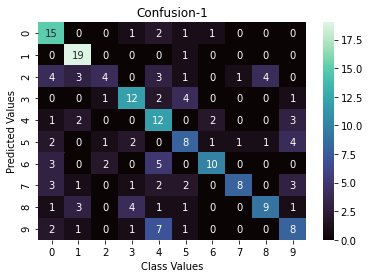

In [17]:
heatMap = sns.heatmap(confustion1, annot=True, cmap='mako')
plt.title('Confusion-1')
plt.xlabel('Class Values')
plt.ylabel('Predicted Values')
plt.savefig('Confusion-1'+'.jpg')
plt.show()

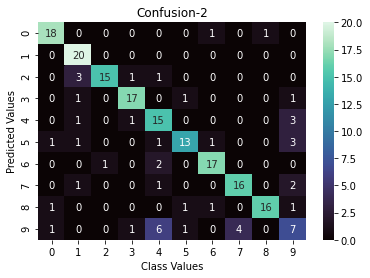

In [18]:
heatMap = sns.heatmap(confustion2, annot=True, cmap='mako')
plt.title('Confusion-2')
plt.xlabel('Class Values')
plt.ylabel('Predicted Values')
plt.savefig('Confusion-2'+'.jpg')
plt.show()

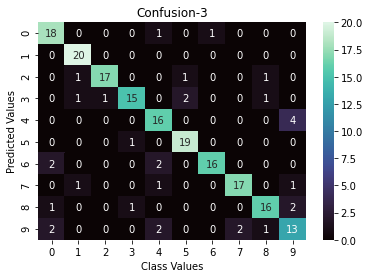

In [19]:
heatMap = sns.heatmap(confustion3, annot=True, cmap='mako')
plt.title('Confusion-3')
plt.xlabel('Class Values')
plt.ylabel('Predicted Values')
plt.savefig('Confusion-3'+'.jpg')
plt.show()

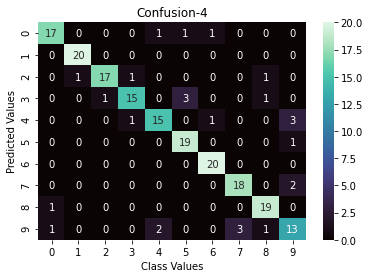

In [20]:
heatMap = sns.heatmap(confustion4, annot=True, cmap='mako')
plt.title('Confusion-4')
plt.xlabel('Class Values')
plt.ylabel('Predicted Values')
plt.savefig('Confusion-4'+'.jpg')
plt.show()